<a href="https://colab.research.google.com/github/lindseyvanosky/machine_learning/blob/main/LV_American_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of American Income Census Data
- Lindsey Vanosky
- July 2022

#Selecting a Data Set

###Import, Upload & Inspect

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import ticker as mticker
from matplotlib import style
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings("ignore")

filename = "/content/drive/MyDrive/Coding Dojo/02 Stack 2: Intro to Machine Learning/Data Sets/adult.data"

df = pd.read_csv(filename, header = None, skipinitialspace = True) 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Info

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###Questions

Source: [Kaggle](https://www.kaggle.com/datasets/danielbethell/adult-incomes-in-the-united-states?select=adult.names)
<br>
This data was extracted from the census bureau [database.](http://www.census.gov/ftp/pub/DES/www/welcome.html)

Description: This data set contains demographics on the American people in order to determine if they make more that $50K



Target: Income

Classification or Regression? Classification! Does this person make more than $50k yes, or no?

Features: Age, Sex, Education, Job Type, Family, Race

How many rows? 32560

Potential Challenges: One challenge I see with this data set is that it does not have a header, so we will have to rename each column to make it make sense. 

#Data Cleaning

####Dictionary from Kaggle


- age
- workclass (eg. private, local-gov, never-worked…)
- fnlwgt (the number of people the census believes the entry represents)
- education
- education-num
- marital-status
- occupation
- relationship
- race
- gender
- capital-gain
- capital-loss
- hours-per-week
- native country
- outcome (whether the individual makes more than $50,000 annually

###Renaming Columns 

In [163]:
df = df.rename(columns = {0 : "age", 1 : "workclass", 2 : "fnlwgt", 3 : "education", 4 : "education_num", 5 : "marital_status", 6 : "occupation", 7 : "relationship", 8 : "race", 9 : "gender", 10 : "capital_gain", 11 : "capital_loss", 12 : "hours_per_week", 13 : "native_country", 14 : "outcome"})

In [164]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Duplicates, NaN & Inconsistencies

###Duplicates

In [165]:
df.duplicated().sum()

24

In [166]:
df = df.drop_duplicates()
df.duplicated().sum()

0

###Missing Data

In [167]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
outcome           0
dtype: int64

###Dropping Irrelevant Columns

In [168]:
df = df.drop(columns = ["fnlwgt", "education_num"])

These columns do not provide us with interpretable information. 

###Value Counts

####Age

In [169]:
df["age"].value_counts(ascending = False).to_frame()
#all values consistent

,age
36,898
31,888
34,886
23,876
33,875
...,...
83,6
88,3
85,3
86,1


####Workclass

In [170]:
df["workclass"].value_counts(ascending = False).to_frame()
df["workclass"].replace({"?" : "Other"}, inplace = True)

In [171]:
df["workclass"].value_counts(ascending = False)
#all values consistent

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

####Education

In [172]:
df["education"].value_counts(ascending = False).to_frame()
#all values consistent

,education
HS-grad,10494
Some-college,7282
Bachelors,5353
Masters,1722
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,645
Prof-school,576


####Marital Status

In [173]:
df["marital_status"].value_counts(ascending = False).to_frame()
#all values consistent

,marital_status
Married-civ-spouse,14970
Never-married,10667
Divorced,4441
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


####Occupation

In [174]:
df["occupation"].value_counts(ascending = False).to_frame()
#considering we already have a value called "other - service" we will change the "?" values to NaN and correct them upon imputation. 
df["occupation"] = df["occupation"].replace("?", "unknwn")
df["occupation"].value_counts()
#all values consistent

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
unknwn               1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

####Relationship

In [175]:
df["relationship"].value_counts(ascending = False).to_frame()
#all values consistent

,relationship
Husband,13187
Not-in-family,8292
Own-child,5064
Unmarried,3445
Wife,1568
Other-relative,981


####Race

In [176]:
df["race"].value_counts(ascending = False).to_frame()
#all values consistent

,race
White,27795
Black,3122
Asian-Pac-Islander,1038
Amer-Indian-Eskimo,311
Other,271


####Gender

In [177]:
df["gender"].value_counts(ascending = False).to_frame()
#all values consistent

,gender
Male,21775
Female,10762


####Capital Gain

In [178]:
df["capital_gain"].value_counts(ascending = False).to_frame()
#all values consistent

,capital_gain
0,29825
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1
4931,1


####Capital Loss

In [179]:
df["capital_loss"].value_counts(ascending = False).to_frame()
#all values consistent

,capital_loss
0,31018
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1
2489,1


####Hours Per Week

In [180]:
df["hours_per_week"].value_counts(ascending = False).to_frame()
#all values consistent

,hours_per_week
40,15204
50,2817
45,1823
60,1475
35,1296
...,...
82,1
92,1
87,1
74,1


####Native Country

In [181]:
df["native_country"].value_counts(ascending = False).to_frame()
df["native_country"] = df["native_country"].replace("?", "Other")
df["native_country"].value_counts()
#all values consistent

United-States                 29153
Mexico                          639
Other                           582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

####Outcome

In [182]:
df["outcome"].value_counts(ascending = False).to_frame()
#all values consistent

,outcome
<=50K,24698
>50K,7839


We can see here that our data isn't balanced. We must keep this in mind as we explore the data. 

#Univariate Visualizations

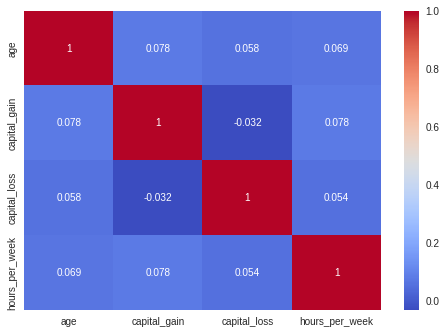

In [183]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm");

We can see here that the only remotely strong correlation in the numerical data set is the negative correlation between capital_gain and capital_loss which is to be expected. 

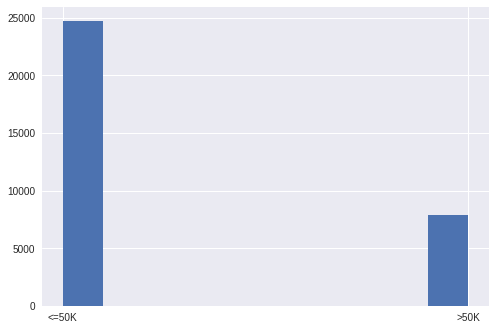

In [184]:
plt.hist(df["outcome"]);

We can see how unbalanced this data set is. There are actions we can take to help balance the data, but for now we will just work with the Standard Scaler. 

#Explanatory Visuals

##Line Plot

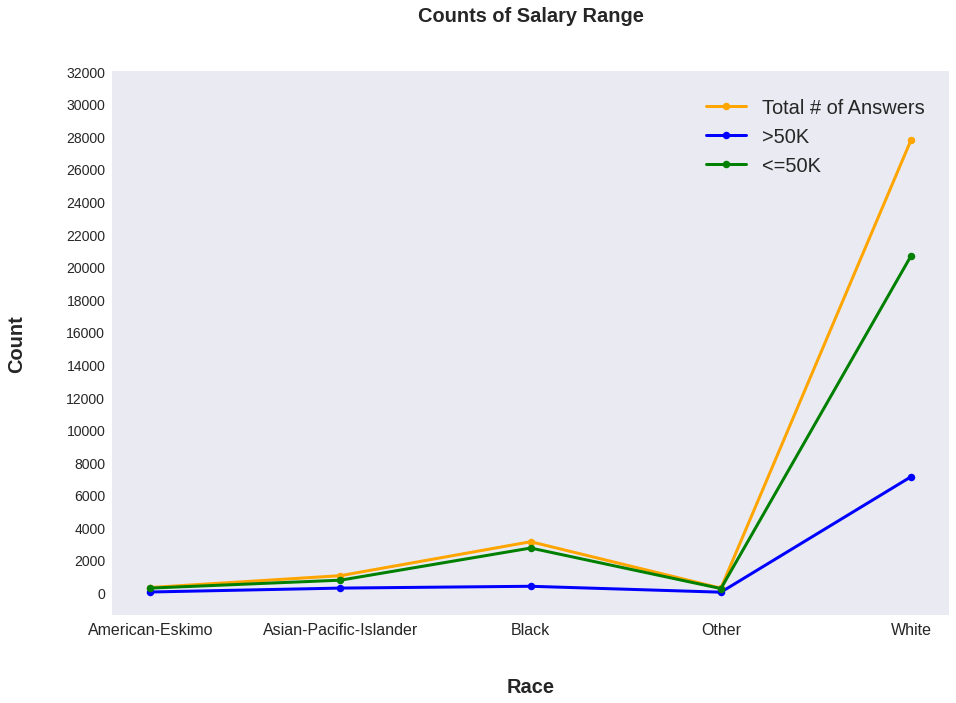

In [185]:
line_df = df.copy()

#encode
line_df["outcome"].replace({">50K" : 1, "<=50K" : 0}, inplace = True)

#>50K
pos_filter = line_df["outcome"] == 1
pos_df = line_df.loc[pos_filter, :]
pos_df = pos_df.groupby(["race"])["outcome"].sum()

#<=50K
neg_filter = line_df["outcome"] == 0 
neg_df = line_df.loc[neg_filter, :]
neg_df = neg_df.groupby(["race"])["outcome"].value_counts()

#total
r = line_df["race"].value_counts()
total_df = line_df.groupby(["race"])["race"].value_counts()

#plots
fig, ax = plt.subplots(figsize = (15, 10))
total_df.plot(kind = "line", x = "race", y = r, marker = ".", markersize = 15, lw = 3, color = "orange", label = "Total # of Answers")
pos_df.plot(kind = "line", x = "race", y = "outcome", marker = ".", markersize = 15, lw = 3, color = "blue", label = ">50K");
neg_df.plot(kind = "line", x = "race", y = "outcome", marker = ".", markersize = 15, lw = 3, color = "green", label = "<=50K");

#title params
plt.title("Counts of Salary Range", fontsize = 20, fontweight = "bold", pad = 50, loc = "center", fontfamily = "sans-serif");

#axis params
plt.tick_params(axis = "both", which = "major", labelsize = 14);

#x paarams
plt.xticks(fontweight = "medium", fontfamily = "sans-serif", fontsize = 16)
plt.xlabel("Race", fontsize = 20, fontweight = "bold", labelpad = 40, fontfamily = "sans-serif");
plt.xticks([0, 1, 2, 3, 4], ["American-Eskimo", "Asian-Pacific-Islander", "Black", "Other", "White"])

#y params
plt.yticks(np.arange(0, 33000, 2000));
plt.yticks(fontweight = "medium", fontfamily = "sans-serif")
plt.ylabel("Count", fontsize = 20, fontweight = "bold", labelpad = 40, fontfamily = "sans-serif");

#stylization
plt.style.use("seaborn");
ax.grid(False);

#legend
legend = plt.legend(fontsize = 20, borderaxespad = 5, loc = "upper right", bbox_to_anchor = (1.1, 1.15));

Analysis:

This line plot represents salaries by race. This census data categorized salaries as either >50K or <=50K. At first plot, it looked like there was a massive disparity of >50K by race. It looked as if salaries over 50K were disproprtionally awarded to white people. This isn't necessarily untrue, but I found it important to plot the line of total answers by race so we can see who this data actually represents. Adding this line did highlight that the majority of our data was from white people. Therefore my first recommendation - more data! 
<br></br>
However, plotting the total answers line also showed that there was indeed a disparity primarily in the Black category. We can see there is a significant gap between the orange line and the blue line in this category, indicating that the overwhelming majority of black people represented here make less than $50K. 

##Bar Chart

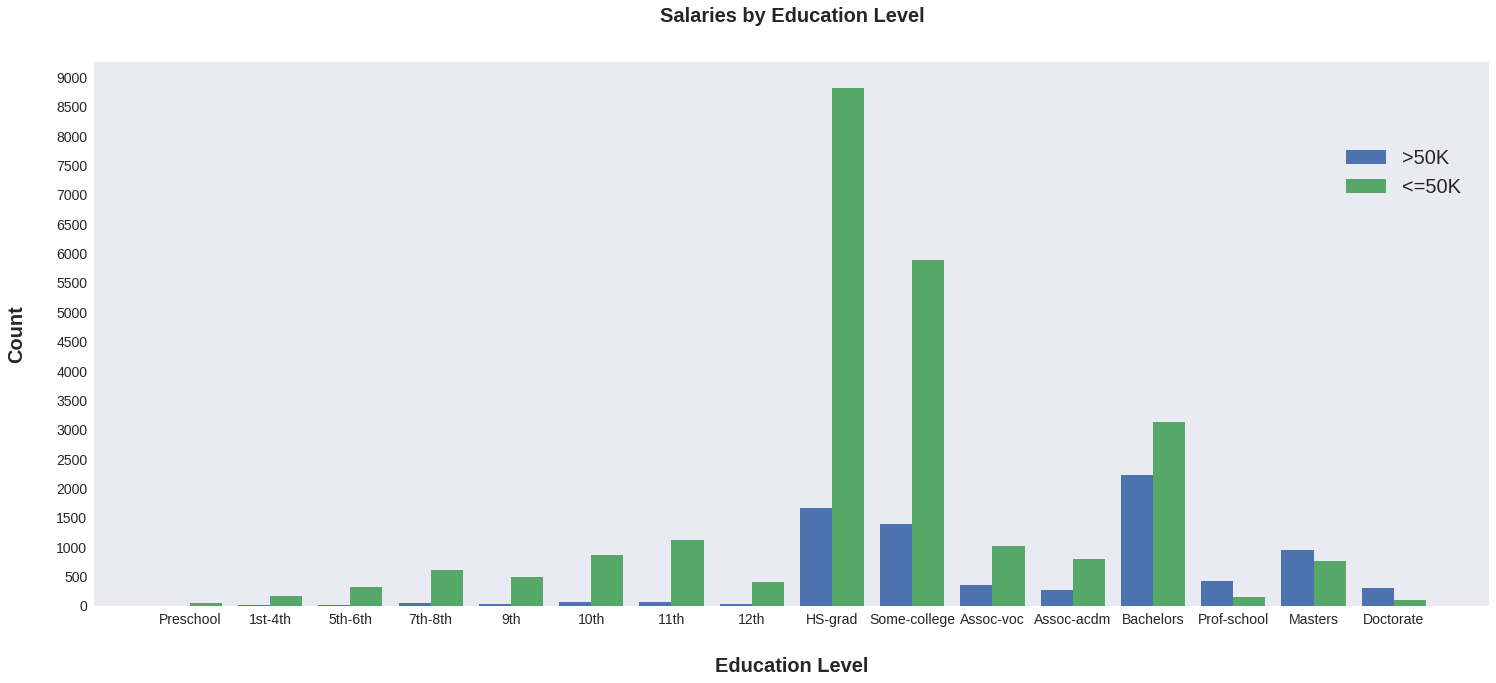

In [186]:
bar_df = line_df
#reorder columns
bar_df["education"] = pd.Categorical(bar_df["education"], categories = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Prof-school", "Masters", "Doctorate"], ordered = True)

#>50K
pos_filter = bar_df["outcome"] == 1
pos_df = bar_df.loc[pos_filter, :]
pos_edu_df = pos_df.groupby(["education"])["outcome"].sum()

#<=50K
neg_filter = bar_df["outcome"] == 0 
neg_df = bar_df.loc[neg_filter, :]
neg_edu_df = neg_df.groupby(["education"])["outcome"].value_counts()

#plot
fig, ax = plt.subplots(figsize = (25, 10))
x_axis = np.arange(len(bar_df["education"].value_counts()))
plt.bar(x_axis -0.2, pos_edu_df, width=0.4, label = ">50K")
plt.bar(x_axis +0.2, neg_edu_df, width=0.4, label = "<=50K")

#title params
plt.title("Salaries by Education Level", fontsize = 20, pad = 40, fontweight = "bold", fontfamily = "sans-serif");

#x params
plt.xlabel("Education Level", fontsize = 20, fontweight = "bold", labelpad = 30, fontfamily = "sans-serif")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Prof-school", "Masters", "Doctorate"], fontweight = "medium", fontsize = 14, fontfamily = "sans-serif");
plt.xticks(fontsize = 14, fontweight = "medium", fontfamily = "sans-serif")

#y params
plt.ylabel("Count", fontsize = 20, fontweight = "bold", labelpad = 30, fontfamily = "sans-serif")
plt.yticks(fontweight = "medium", fontsize = 14, fontfamily = "sans-serif");
plt.yticks(np.arange(0, 9001, 500));

#stylization
plt.style.use("seaborn")
ax.grid(False);

#legend
legend = plt.legend(fontsize = 20, borderaxespad = 8, loc = "upper right", bbox_to_anchor = (1.1, 1.15));

Analysis:

This bar chart represents salaries by education level. As we can clearly see it pays to stay in school! The highest concentration of salaries >50K is from HS grad and beyond. What's interesting is that there is a large disparity in number of people making >50K amd <=50K in the HS and some college columns. I'd recommend more data and if we still see the same thing, it'd be worthwhile to examine the other features of those that fall in each of those categories. What makes one HS grad make more than another?
<br></br>
The fact that the total number of >50K is very similar between the HS grad and Bachelors columns, makes me think there could be opportunity to use this data set as a tool to decided whether to go to college or not base on finances. 
<br></br>
Prof school, masters, and doctorate, are the only columns where those earning >50k outnumber those making <=50K. 
<br></br>
Another interesting point is that there are numbers in the lower level education that make >50K. Proof that you can still make money without a diploma, it's just rare. 

#Preprocessing

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital_status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   gender          32537 non-null  object
 8   capital_gain    32537 non-null  int64 
 9   capital_loss    32537 non-null  int64 
 10  hours_per_week  32537 non-null  int64 
 11  native_country  32537 non-null  object
 12  outcome         32537 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [188]:
x = df.drop(columns = "outcome")
y = df["outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [189]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

num_tupe = (num_pipe, num_selector)
cat_tupe = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tupe, cat_tupe)

In [190]:
preprocessor.fit(x_train, y_train)

x_train_pro = preprocessor.transform(x_train)
x_test_pro = preprocessor.transform(x_test)

#Supervised Machine Learning

## Model 1: Decision Tree

###Model - No PCA

####Instantiation

In [191]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [192]:
dec_tree.fit(x_train_pro, y_train)

DecisionTreeClassifier(random_state=42)

####Predictions

In [193]:
test_preds = dec_tree.predict(x_test_pro)

####Performance Metrics

In [194]:
train_score = dec_tree.score(x_train_pro, y_train)
test_score = dec_tree.score(x_test_pro, y_test)
print(train_score)
print(test_score)

0.979837718219818
0.8206515058389674


In [195]:
dec_tree_cr = classification_report(y_test, test_preds)
print(dec_tree_cr)

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      6159
        >50K       0.64      0.61      0.62      1976

    accuracy                           0.82      8135
   macro avg       0.76      0.75      0.75      8135
weighted avg       0.82      0.82      0.82      8135



Currently this model is fitting nicely and scoring decently across the board. We can see that the predictions are slightly more off on the >50K outcome, likely due to the fact that the majority of the data is in the <=50K. 

####Confusion Matrix

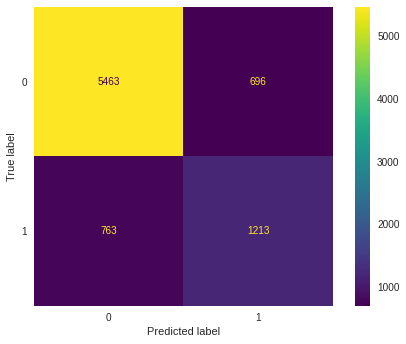

In [196]:
dec_tree_cm = confusion_matrix(y_test, test_preds)

dec_tree_disp = ConfusionMatrixDisplay(dec_tree_cm)

dec_tree_disp.plot()
plt.grid(None)
plt.style.use("seaborn")

###Model - With PCA

####Instantiation

In [197]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [198]:
pca = PCA(n_components = .95)

pca_pipe = make_pipeline(pca)
pca_pipe.fit(x_train_pro, y_train_le)

Pipeline(steps=[('pca', PCA(n_components=0.95))])

In [199]:
dec_tree_pca = DecisionTreeClassifier(random_state = 42)
dec_tree_pca.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [200]:
dec_tree_pca.fit(x_train_pro, y_train_le)

DecisionTreeClassifier(random_state=42)

####Predictions

In [201]:
test_preds_pca = dec_tree_pca.predict(x_test_pro)

####Performance Metrics

In [202]:
train_score_pca = dec_tree_pca.score(x_train_pro, y_train_le)
test_score_pca = dec_tree_pca.score(x_test_pro, y_test_le)
print(train_score_pca)
print(test_score_pca)

0.979837718219818
0.8206515058389674


In [203]:
dec_tree_pca_cr = classification_report(y_test_le, test_preds_pca)
print(dec_tree_pca_cr)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6159
           1       0.64      0.61      0.62      1976

    accuracy                           0.82      8135
   macro avg       0.76      0.75      0.75      8135
weighted avg       0.82      0.82      0.82      8135



We didn't see any increse or decrease using PCA. This isn't suprising because for one, it is already a small data set in terms of features. Also, the nature of a decision tree splits data based on features, therefore combining features (PCA) will result in little to no change as the data was already going to be sorted that way. 

####Confusion Matrix

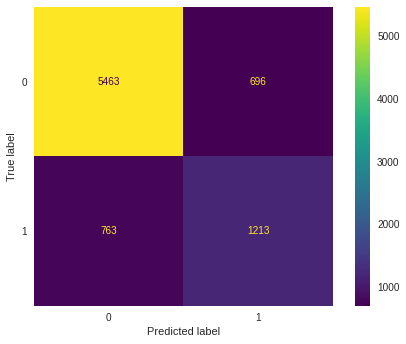

In [204]:
dec_tree_pca_cm = confusion_matrix(y_test_le, test_preds_pca)

dec_tree_pca_disp = ConfusionMatrixDisplay(dec_tree_pca_cm)

dec_tree_pca_disp.plot()
plt.grid(None)
plt.style.use("seaborn")

##Model 2: KNN

###Model: No PCA

####Instantiation

In [205]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(knn)
knn_pipe.fit(x_train_pro, y_train)

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

####Predictions

In [206]:
%%time
knn_test_preds = knn_pipe.predict(x_test_pro)

CPU times: user 6.37 s, sys: 411 ms, total: 6.78 s
Wall time: 5.22 s


####Performance Metrics

In [207]:
classification = classification_report(y_test, knn_test_preds)
print(classification)

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      6159
        >50K       0.66      0.61      0.63      1976

    accuracy                           0.83      8135
   macro avg       0.77      0.75      0.76      8135
weighted avg       0.82      0.83      0.83      8135



####Confusion Matrix

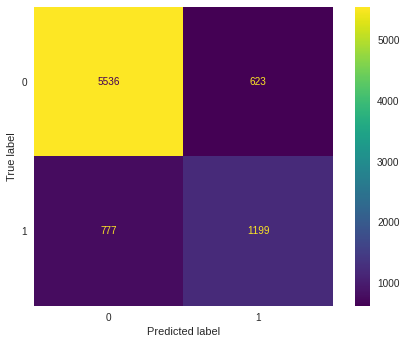

In [208]:
knn_cm = confusion_matrix(y_test, knn_test_preds)

knn_disp = ConfusionMatrixDisplay(knn_cm)

knn_disp.plot()
plt.grid(None)
plt.style.use("seaborn")

###Model: With PCA

####Instantiation

In [209]:
pca_knn = KNeighborsClassifier()
pca_knn_pipe = make_pipeline(pca_pipe, pca_knn)
pca_knn_pipe.fit(x_train_pro, y_train)

Pipeline(steps=[('pipeline', Pipeline(steps=[('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

####Predictions

In [210]:
%%time
knn_pca_test_preds = pca_knn_pipe.predict(x_test_pro)

CPU times: user 4.8 s, sys: 272 ms, total: 5.07 s
Wall time: 4.28 s


####Performance Metrics

In [211]:
pca_classification = classification_report(y_test, knn_pca_test_preds)
print(pca_classification)

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      6159
        >50K       0.66      0.60      0.63      1976

    accuracy                           0.83      8135
   macro avg       0.77      0.75      0.76      8135
weighted avg       0.82      0.83      0.83      8135



####Confusion Matrix

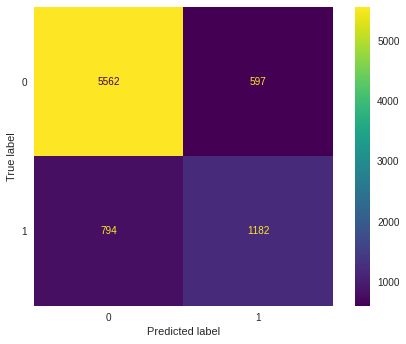

In [212]:
knn_pca_cm = confusion_matrix(y_test, knn_pca_test_preds)

knn_pca_disp = ConfusionMatrixDisplay(knn_pca_cm)

knn_pca_disp.plot()
plt.grid(None)
plt.style.use("seaborn")

##Model 3: Random Forest Classifier

###Model: Baseline

####Instantiation

In [213]:
rf = RandomForestClassifier(random_state = 42)
rf_pipe = make_pipeline(rf)
rf_pipe.fit(x_train_pro, y_train)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

####Performance Test

In [214]:
rf_test_score = rf_pipe.score(x_test_pro, y_test)
rf_train_score = rf_pipe.score(x_train_pro, y_train)
print(rf_test_score)
print(rf_train_score)

0.8457283343577136
0.9797557577247766


In [215]:
rf_test_pred = rf_pipe.predict(x_test_pro)

rf_cr = classification_report(y_test, rf_test_pred)
print(rf_cr)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6159
        >50K       0.71      0.63      0.66      1976

    accuracy                           0.85      8135
   macro avg       0.79      0.77      0.78      8135
weighted avg       0.84      0.85      0.84      8135



####Hyperparameter Tuning

In [216]:
rf_pipe.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': 42,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'steps': [('randomforestclassifier',
   RandomForestClassifier(random_stat

GridSearchCV

In [217]:
#Param Grid
param_grid = {"randomforestclassifier__max_depth": range(8, 10), "randomforestclassifier__min_samples_split": range(1, 5), "randomforestclassifier__min_samples_leaf": range(1, 5)}

In [218]:
rf_gridsearch = GridSearchCV(rf_pipe, param_grid)

rf_gridsearch.fit(x_train_pro, y_train)
print("Best Params")
print(rf_gridsearch.best_params_)
best_pipe = rf_gridsearch.best_estimator_
print(f"Accuracy of best RF Model is: {best_pipe.score(x_test_pro, y_test)}")

Best Params
{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 2}
Accuracy of best RF Model is: 0.8590043023970498


###Model: Optimized 

In [219]:
new_rf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 2, min_samples_split = 2)
new_rf.fit(x_train_pro, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2)

####Predictions

In [220]:
rf_train_pred2 = new_rf.predict(x_train_pro)
rf_test_pred2 = new_rf.predict(x_test_pro)

####Performance Test

In [221]:
new_rf_cr = classification_report(y_test, rf_test_pred2)
print(new_rf_cr)

              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      6159
        >50K       0.82      0.54      0.65      1976

    accuracy                           0.86      8135
   macro avg       0.85      0.75      0.78      8135
weighted avg       0.86      0.86      0.85      8135



While we see some great increases in scoring on the negative outcome, we see a significant drop in recall score on the positive outcome set. This mean that this model is producing false negatives at a higher rate. 
<br></br>
In this situation, a false negative would mean that we predicted that someone would make <=50K based on criteria and instead they end up making >50K. I would consider this an extremely low risk, so accepting these errors alongside the good scores on the <=50K outcome set would still lead to a successful model. 

####Confusion Matrix

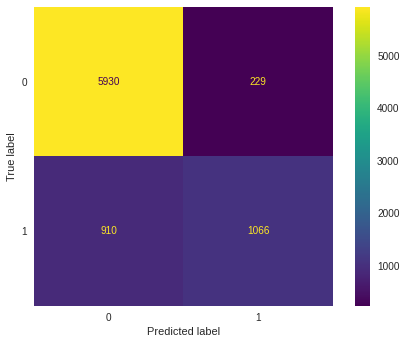

In [222]:
rf_cm = confusion_matrix(y_test, rf_test_pred2)

rf_disp = ConfusionMatrixDisplay(rf_cm)

rf_disp.plot()
plt.grid(None)
plt.style.use("seaborn")

#Unsupervised Machine Learning 


##Model 1: KMeans

###Preprocessing

In [223]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,outcome
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   education       32537 non-null  object
 3   marital_status  32537 non-null  object
 4   occupation      32537 non-null  object
 5   relationship    32537 non-null  object
 6   race            32537 non-null  object
 7   gender          32537 non-null  object
 8   capital_gain    32537 non-null  int64 
 9   capital_loss    32537 non-null  int64 
 10  hours_per_week  32537 non-null  int64 
 11  native_country  32537 non-null  object
 12  outcome         32537 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [225]:
new_scaler = StandardScaler()
new_ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

new_num_selector = make_column_selector(dtype_include = "number")
new_cat_selector = make_column_selector(dtype_include = "object")

new_num_pipe = make_pipeline(new_scaler)
new_cat_pipe = make_pipeline(new_ohe)

new_num_tupe = (new_num_pipe, new_num_selector)
new_cat_tupe = (new_cat_pipe, new_cat_selector)


new_preprocessor = make_column_transformer(new_num_tupe, new_cat_tupe)

new_df = new_preprocessor.fit_transform(df)
new_df = pd.DataFrame(new_df)
new_df = new_df.rename(columns = {0 : "age", 1 : "workclass", 2 : "fnlwgt", 3 : "education", 4 : "education_num", 5 : "marital_status", 6 : "occupation", 7 : "relationship", 8 : "race", 9 : "gender", 10 : "capital_gain", 11 : "capital_loss", 12 : "hours_per_week", 13 : "native_country", 14 : "outcome"})


In [226]:
new_df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,...,98,99,100,101,102,103,104,105,106,107
32532,-0.849519,-0.145975,-0.216743,-0.197650,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32533,0.103716,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32534,1.423579,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32535,-1.216148,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32536,0.983625,1.887635,-0.216743,-0.035664,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


###Elbow Plot of Inertia

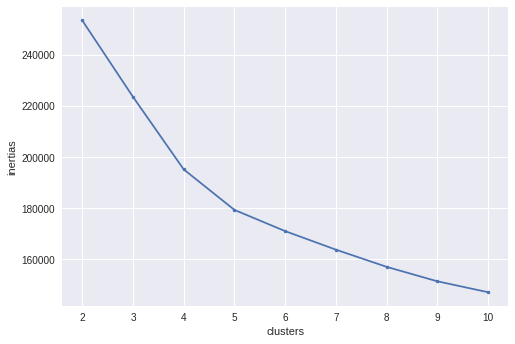

In [227]:
inertias = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(new_df)
  inertias.append(kmeans.inertia_)


plt.plot(range(2, 11), inertias, marker = ".")
plt.xlabel("clusters")
plt.ylabel("inertias");

###Silhouette Score

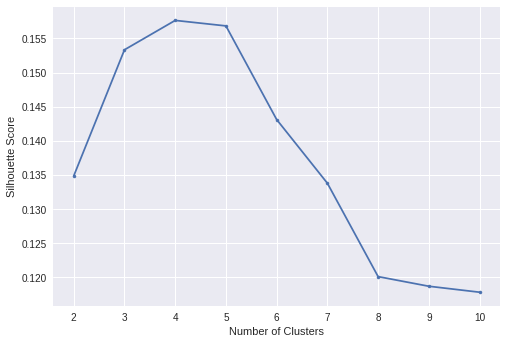

In [228]:
silhouette_scores = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(new_df)
  silhouette_scores.append(silhouette_score(new_df, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker = ".")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score");

####Determining Best KMeans

In [229]:
kmeans2 = KMeans(n_clusters = 2, random_state = 42)
kmeans3 = KMeans(n_clusters = 3, random_state = 42)
kmeans4 = KMeans(n_clusters = 4, random_state = 42)
kmeans5 = KMeans(n_clusters = 5, random_state = 42)
kmeans2.fit(new_df)
kmeans3.fit(new_df)
kmeans4.fit(new_df);
kmeans5.fit(new_df);

In [230]:
new_df["cluster2"] = kmeans2.labels_
new_df["cluster3"] = kmeans3.labels_
new_df["cluster4"] = kmeans4.labels_
new_df["cluster5"] = kmeans5.labels_

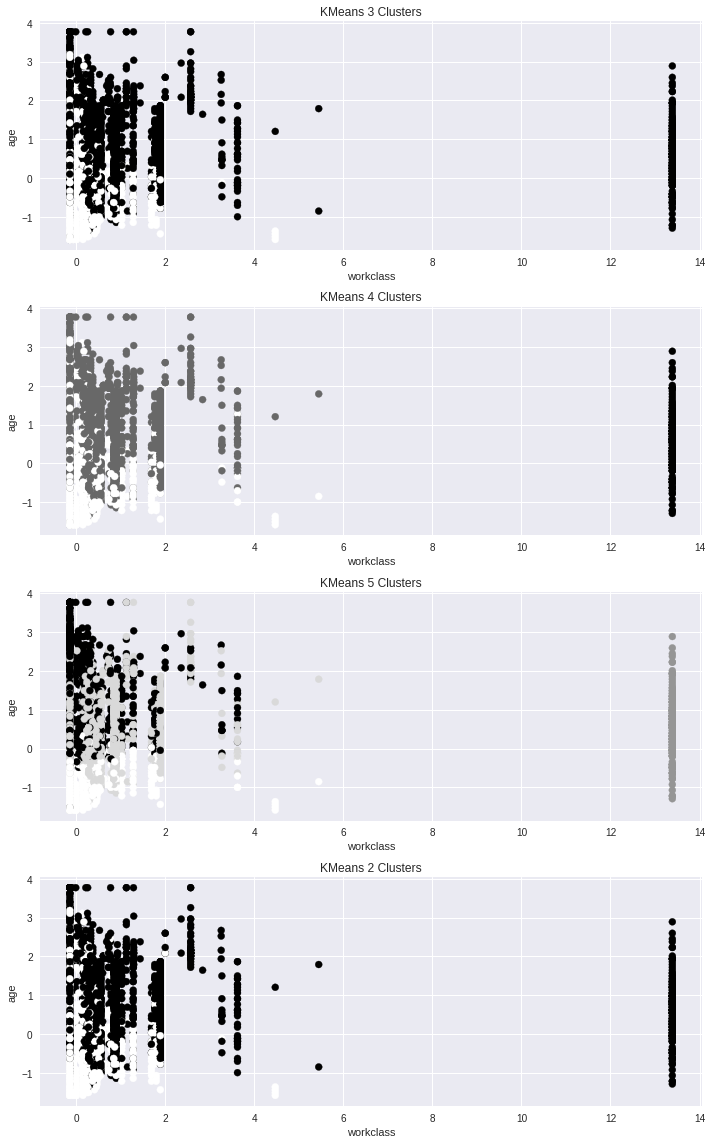

In [231]:
fig, axes = plt.subplots(4, 1, figsize = (10,16))

axes[0].scatter(new_df["workclass"], new_df["age"], c = new_df["cluster3"])
axes[0].set_xlabel("workclass")
axes[0].set_ylabel("age")
axes[0].set_title("KMeans 3 Clusters")

axes[1].scatter(new_df["workclass"], new_df["age"], c = new_df["cluster4"])
axes[1].set_xlabel("workclass")
axes[1].set_ylabel("age")
axes[1].set_title("KMeans 4 Clusters")

axes[2].scatter(new_df["workclass"], new_df["age"], c = new_df["cluster5"])
axes[2].set_xlabel("workclass")
axes[2].set_ylabel("age")
axes[2].set_title("KMeans 5 Clusters")

axes[3].scatter(new_df["workclass"], new_df["age"], c = new_df["cluster2"])
axes[3].set_xlabel("workclass")
axes[3].set_ylabel("age")
axes[3].set_title("KMeans 2 Clusters")

plt.tight_layout();
ax.grid(False);


###Optimized Model

In [232]:
new_df.drop(columns = ["cluster2", "cluster3", "cluster5"], inplace = True)


In [233]:
new_kmeans = KMeans(n_clusters = 3, random_state = 42)

new_kmeans.fit(new_df)
new_df["cluster new"] = new_kmeans.labels_
cluster_groups = new_df.groupby("cluster new", as_index = False).mean()
cluster_groups

,cluster new,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,99,100,101,102,103,104,105,106,107,cluster4
0,0,0.490515,0.139175,-0.215901,0.346168,0.034343,0.070280,0.000000,0.042248,0.636575,...,0.002524,0.001262,0.000598,0.000465,0.898167,0.001461,0.000797,0.571675,0.428325,2.010562
1,1,-0.482340,-0.117420,-0.213858,-0.347576,0.024184,0.056993,0.000437,0.071491,0.758343,...,0.002187,0.001750,0.000562,0.000625,0.892826,0.002625,0.000250,0.961255,0.038745,0.000000
2,2,0.225661,-0.145975,4.505281,0.236793,0.037812,0.083052,0.000000,0.037812,0.644835,...,0.004727,0.002701,0.000000,0.001350,0.908170,0.002026,0.000000,0.479406,0.520594,1.000000


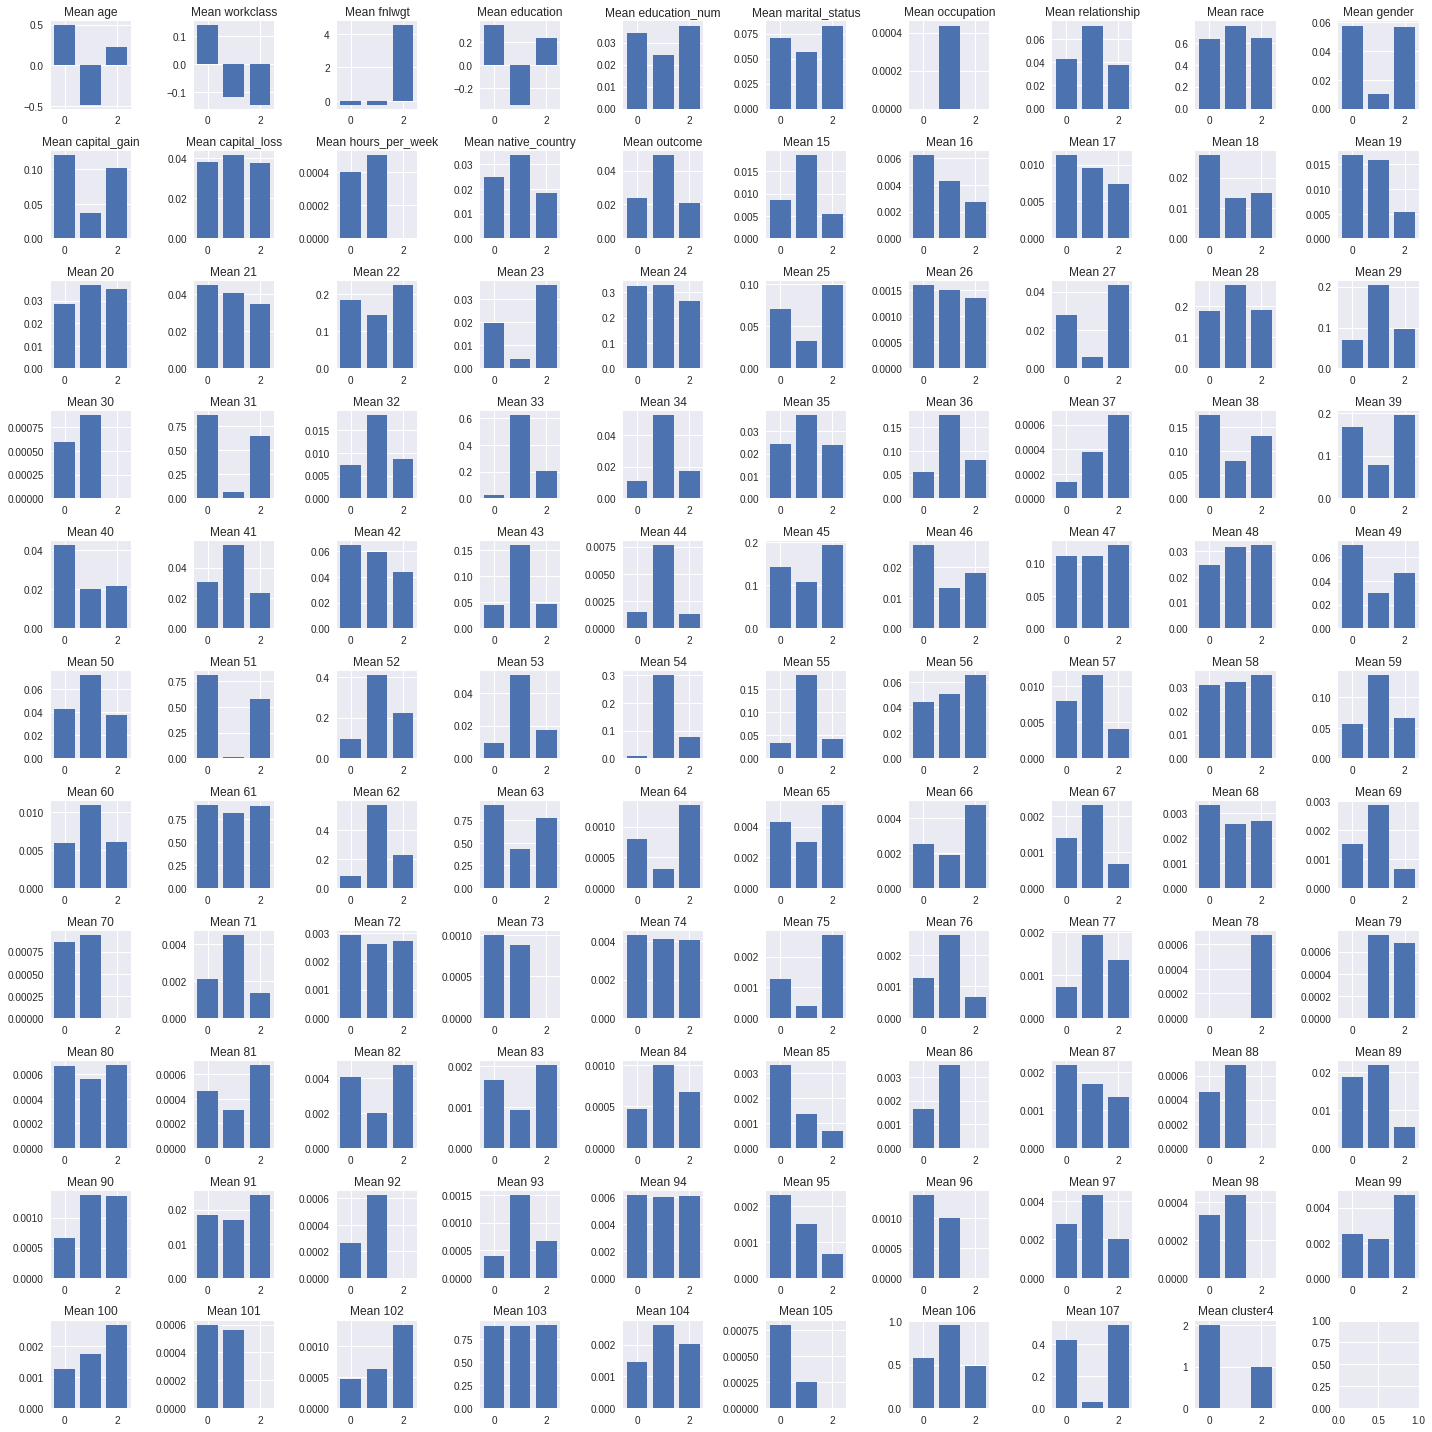

In [234]:
fig, axes = plt.subplots(11,10, figsize = (20,20))
axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups["cluster new"], cluster_groups[col])
  axes[i].set_title(f"Mean {col}")
  plt.tight_layout();

#Analysis

Out of the above models, I would choose the Random Forest Classifier for production. As mentioned in that section, this model performed the best even though we saw a significant amount of false negatives. In this scenario, a false negative is very low risk, so it is acceptable to allow them in the model alongside the good scoring across the board. This model fits well and I believe would perform even better if we had a bit more data in the >50K outcome set. 